In [25]:
! pip install git+https://github.com/mph-/lcapy.git#egg=lcapy

  Cloning https://github.com/mph-/lcapy.git to /tmp/pip-install-yz5uuep2/lcapy_65c2229683c941a489023c1cd89312eb
  Running command git clone -q https://github.com/mph-/lcapy.git /tmp/pip-install-yz5uuep2/lcapy_65c2229683c941a489023c1cd89312eb


## **سوال ۲**

**الف)**

In [26]:
from lcapy import Circuit

a = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0; down, i={i_C}, v={v_C}
W 3_a 4; right
P2 4 0; down, v^=v_s(t)
""")

**ب)**

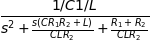

In [27]:
H = a.transfer(1, 0, 4, 0)
H.expr

**ج)**

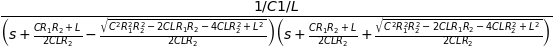

In [28]:
H.ZPK().expr

**د)**

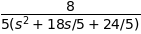

In [29]:
from lcapy import Circuit

b = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2 4; right
L 2 3 {5/2}; right=1.5, i={i_L}
R2 3 0_3 2; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0 {1/4}; down, i={i_C}, v={v_C}
W 3_a 4; right
P2 4 0; down, v^=v_s(t)
""")

H = b.transfer(1, 0, 4, 0)
H.expr

# **Laplace Transform:**

In [30]:
from lcapy import *

f0 = symbol('f0')
delta_ = delta(t)
ddelta = delta_.diff()
x = (3-2*f0)*delta_ + ((f0**2)/2 + ((f0**2)/2 - 6*f0 - 2)*cos(2*t) + ( (3*f0**2)/2 + 2*f0 - 6)*sin(2*t)) * u(t) + ddelta
x.expr

**الف)**

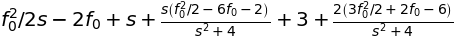

In [31]:
x_LT = x.LT()
x_LT.expr

**ب)**

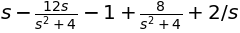

In [32]:
xp, defs = x_LT.parameterize()
defs = {'f0': 2}
X_s = xp.subs(defs).expr
X_s

**ج)**

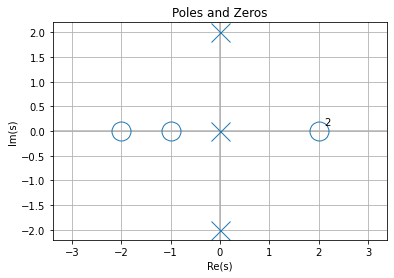

In [33]:
from lcapy import s, j, transfer

X = transfer(X_s)
X.plot(title = "Poles and Zeros")